In [2]:
from zipfile import ZipFile
file_name = "dataset3zipped.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
#Import Label encoder Library
from sklearn import preprocessing
#Import feature selection Library
import statsmodels.api as sm
#Import the train test split Library from sklearn
from sklearn.model_selection import train_test_split

#Import the metrixs for evaluating the model performance
from sklearn.metrics import classification_report
#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import Binarizer
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical


In [4]:
data_path = 'dataset1 - Copy'
img_size=128            
counter=0            
X=[]
Y=[]

In [5]:
class_names = ['Non_Demented', 'Very_Mild_Demented', 'Mild_Demented', 'Moderate_Demented']


In [6]:
categories=os.listdir(data_path)
 
for category in categories:                                                            # this loop to know how many images in categories
    folder_path=os.path.join(data_path,category)                                       # make folder empty has the same path for dataset
    img_names=os.listdir(folder_path)                                                  # put each image in this folder
 
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        fullpath=os.path.join(data_path,category,img_name)
        try:
            img = cv2.imread(fullpath, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (img_size,img_size))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            X.append(img)
            Y.append(category)
            counter+=1
            print(counter)
        except:
             print('no')

Streaming output truncated to the last 5000 lines.
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645

In [7]:
imgs=np.array(X)
lbls=np.array(Y)
del X
del Y

In [8]:
#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(lbls)
lbls_encoded = le.transform(lbls)
 

In [9]:
#splitting data
x_main, x_test, y_main, y_test = train_test_split(imgs, lbls_encoded, test_size=0.20)

x_train,x_val, y_train, y_val =  train_test_split(x_main,y_main, test_size=0.25)

In [10]:
#Normalization
x_train, x_val ,x_test = x_train / 255.0, x_val / 255.0 ,x_test / 255.0

In [11]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=len(class_names))
y_val = to_categorical(y_val, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))


In [12]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3),  padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3),  padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names), activation='softmax'))


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [15]:
#Train the model
history = model.fit(x_train, y_train, epochs=23, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/23
178/178 [==============================] - 17s 32ms/step - loss: 1.1955 - accuracy: 0.4153 - val_loss: 0.7830 - val_accuracy: 0.6436
Epoch 2/23
178/178 [==============================] - 4s 20ms/step - loss: 0.7950 - accuracy: 0.6013 - val_loss: 0.7020 - val_accuracy: 0.6531
Epoch 3/23
178/178 [==============================] - 4s 20ms/step - loss: 0.7175 - accuracy: 0.6416 - val_loss: 0.6439 - val_accuracy: 0.6753
Epoch 4/23
178/178 [==============================] - 4s 22ms/step - loss: 0.6473 - accuracy: 0.6933 - val_loss: 0.6623 - val_accuracy: 0.6594
Epoch 5/23
178/178 [==============================] - 4s 22ms/step - loss: 0.5742 - accuracy: 0.7331 - val_loss: 0.4725 - val_accuracy: 0.8022
Epoch 6/23
178/178 [==============================] - 4s 21ms/step - loss: 0.4979 - accuracy: 0.7680 - val_loss: 0.4944 - val_accuracy: 0.7795
Epoch 7/23
178/178 [==============================] - 4s 22ms/step - loss: 0.4570 - accuracy: 0.7881 - val_loss: 0.4503 - val_accuracy: 0.801

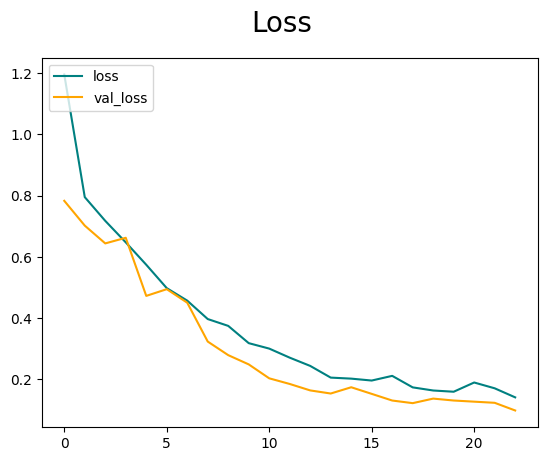

In [16]:
#loss curve 
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

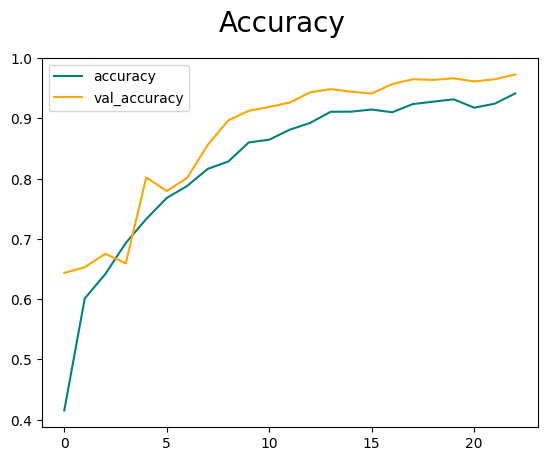

In [17]:
#accurcy curve
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [18]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(x_val,y_val)
print('validation accuracy:',  val_acc)



60/60 [==============================] - 1s 10ms/step - loss: 0.0984 - accuracy: 0.9730
validation accuracy: 0.973030149936676


In [19]:
#testing the model
predict = model.predict(x_test)
predicted = np.argmax(predict, axis = 1)
y_test_arg = np.argmax(y_test,axis=1)

Accuracy = accuracy_score(y_test_arg,predicted)
print("Accuracy :", Accuracy)


60/60 [==============================] - 0s 7ms/step
Accuracy : 0.9661554732945531


In [20]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test accuracy:', test_acc)


60/60 [==============================] - 1s 8ms/step - loss: 0.1052 - accuracy: 0.9662
Test accuracy: 0.966155469417572


In [21]:
f1_score=f1_score(y_test_arg, predicted, average= 'weighted')
RecallScore = recall_score(y_test_arg, predicted, average= 'weighted') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)
print('f1_score is : ', f1_score)

Recall Score is :  0.9661554732945531
f1_score is :  0.9661354763987735


In [22]:
PrecisionScore = precision_score(y_test_arg, predicted,average= 'weighted') #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.9662158479228925


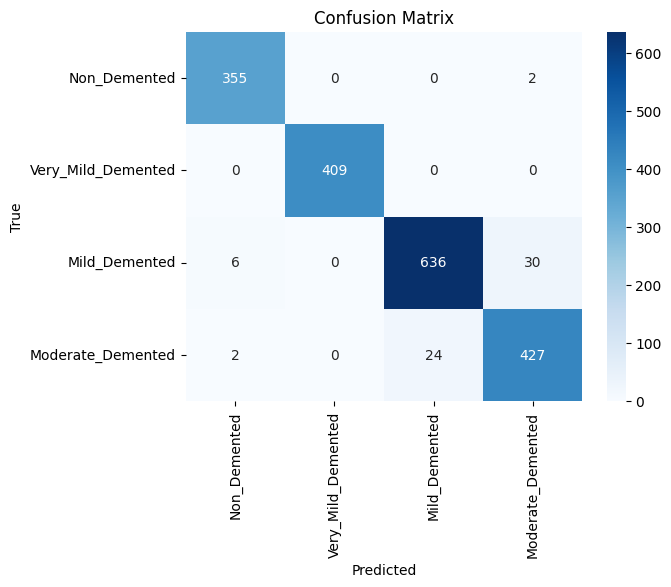

In [23]:
import seaborn as sns
# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test_arg, predicted)

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()